<a href="https://colab.research.google.com/github/shineeyang/Machine-Learning/blob/master/AFW_individual_project_Shini_Yang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Angel Flight West](https://pbs.twimg.com/media/Dz9I0uUUYAAREbM?format=jpg&name=medium)

## Import Dataset

In [1]:
import pandas as pd
afw= pd.read_csv("https://raw.githubusercontent.com/shineeyang/Machine-Learning/master/individual%20project%20dataset.csv")
afw.head()

,id,request_by,pass_gender,pass_weight,dest_state,orgin_state,waiver_required,illness,financial,facility_name
0,7,1,male,42.0,CO,CO,NaN,Diabetes type 1,Ground transportation too difficult for pax. F...,Barbara Davis Center
1,8,1,male,125.0,CA,CO,1.0,Legally blind,Low income family living in low income housing,Dr. Dalel Tartak
2,9,1,male,180.0,TX,NM,NaN,Melanoma,AFSC Pax,"START - San Antonio, TX"
3,10,2,female,121.0,CO,MT,1.0,"multiple slerosis with impaired gait,balance, ...",very low income monthly,UNIV. OF CO NEUROSCIENCE
4,11,2,female,149.0,CA,CA,1.0,Extensive surgical resection of malignant tumo...,NaN,UC San Diego Thornton Hospital


In [0]:
non_mission=pd.read_csv("https://raw.githubusercontent.com/shineeyang/Machine-Learning/master/become0-finance%2Cillness.csv")
non_mission['pass_weight'] = non_mission['pass_weight'].fillna(0)

## Load packages

In [0]:
import numpy as np
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import DataFrame

##Data Preparation

In [3]:
afw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 10 columns):
id                 1900 non-null int64
request_by         1900 non-null int64
pass_gender        1880 non-null object
pass_weight        1899 non-null float64
dest_state         383 non-null object
orgin_state        385 non-null object
waiver_required    1686 non-null float64
illness            1859 non-null object
financial          1836 non-null object
facility_name      1685 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 148.5+ KB


In [0]:
# step 1: turn data into numeric type for computation
df = afw.convert_objects(convert_numeric=True)
# step2: fill all the NaN values
df['waiver_required'] = df['waiver_required'].fillna(0)
df['pass_gender'] = df['pass_gender'].fillna(0)
df['pass_weight'] = df['pass_weight'].fillna(0)
#step3: change gender to numeric value
df.pass_gender[df.pass_gender == 'male'] = 1
df.pass_gender[df.pass_gender == 'female'] = 2
#step4: get dummys for categorical data
df = pd.get_dummies(data=df, columns=['illness','financial','facility_name'])
df.isnull().sum()
# one mistake here is that when I run the leaner analysis on pass_gender,I got an error saying"can't convert string to float: Unknown.
#But I don't have any null value at that time. it takes me quite a long time to figure out the reason, and the reason is that in the pass_gender column
# there are literally people who put 'Unknown' in their gender type. So, with the respect of LGBT group, that's something that you may also want to consider
# to add a category over there.
df.isnull().sum().head()
# then i added
df.pass_gender[df.pass_gender == 'unknown'] = 0

## Data visualization

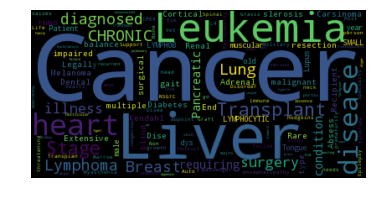

In [9]:
#1.word cloud on illness of those requests that became_mission
from wordcloud import WordCloud
a=afw['illness'].fillna('')
b=str(a)
type(b)

# Generate a word cloud image
wordcloud = WordCloud().generate(b)

# lower max_font_size
wordcloud = WordCloud(max_font_size=800).generate(b)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#as it can be viewed that Cancer/heart/liver/breast/lung/leukemia disease that pops up a lot, which are diseases that are expensive to treat

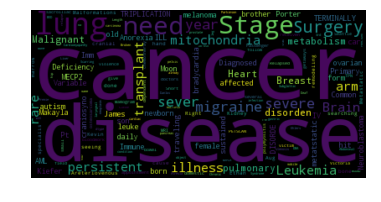

In [11]:
# word cloud on illness of those requests that did not become_mission
from wordcloud import WordCloud
a1=non_mission['illness'].fillna('')
b1=str(a1)
type(b1)

# Generate a word cloud image
wordcloud = WordCloud().generate(b1)

# lower max_font_size
wordcloud = WordCloud(max_font_size=800).generate(b1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# cancer is still outstanding, other disease are also similar to those that become missions

(-0.5, 399.5, 199.5, -0.5)

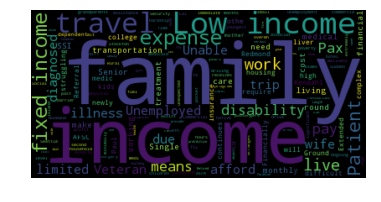

In [14]:
# I further take a look at the finanical field, where requesters explain their situations.

c=afw['financial'].fillna('')
c=str(c)
type(c)

# Generate a word cloud image
wordcloud = WordCloud().generate(c)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#For those whose requests are being accepted, low-income, unemployed, veteran, single, are frequently popping up.

(-0.5, 399.5, 199.5, -0.5)

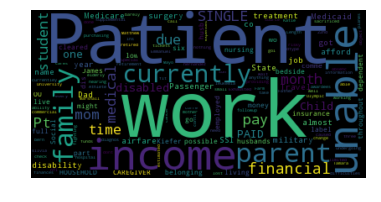

In [15]:
# what about those whose requests didn't get accpeted?
c1=non_mission['financial'].fillna('')
c1=str(c1)
wordcloud = WordCloud().generate(c1)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# I saw "Patient" that wasn't a major word in the above picture became a major 
#word here. I have an assumption on this is that patient themselves don't really 
#all them patients, but people who help them requests would call them patient. 
#people like social workers, physicians, camp organizers. 
#But is it true? those requests requested for people themselves by themselves 
#are more possible to be accpeted?

In [27]:
# I use a group_by function here to do a value counts on the request_by column,there are 7 types of request_by,
# according to the analyst in AFW, type 1 here represents the "request by yourself"
#type 2,3,4,5,6 here respectively represents social workers, physicians, camp organizers.
# though 0 here is the largest requester group, it's actually represents AFW's own coordinator.
# They sometimes make the requests just on experiements, so that's spam requests.
# Apart from that, type 1 actually make the most become-mission requests.
df.request_by.value_counts()

0    959
1    300
5    271
6    165
3     80
4     66
2     59
Name: request_by, dtype: int64

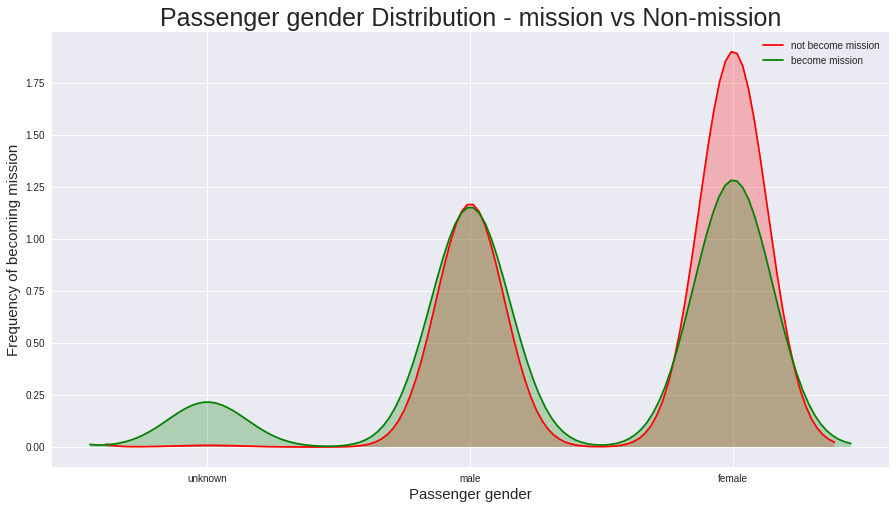

In [48]:
# look at the pass_gender distribution that pass_gender as female has a larger number when it comes to " not become mission"
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(afw_3.pass_gender[afw_3.become_mission == 0] , color='r',shade=True,label='not become mission')
ax=sns.kdeplot(afw_3.pass_gender[afw_3.become_mission == 1] , color='g',shade=True, label='become mission')
plt.title('Passenger gender Distribution - mission vs Non-mission', fontsize = 25)
plt.ylabel("Frequency of becoming mission", fontsize = 15)
plt.xlabel("Passenger gender", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['unknown', 'male', 'female']
plt.xticks(sorted(afw_3.pass_gender.unique()), labels);
plt.show()

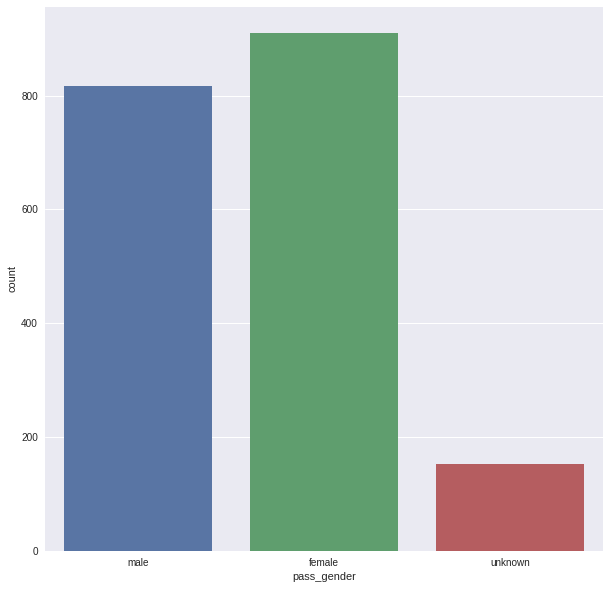

In [0]:
#I am not implying a gender discrimination here, because if we take a furtehr look at 
# pass_gender only in those "become_mission" field, female passengers are actually
# more than male passenger
fig, (ax2) = plt.subplots(1,1,figsize=(10,10))
sns.countplot(x='pass_gender', data=afw, ax=ax2)

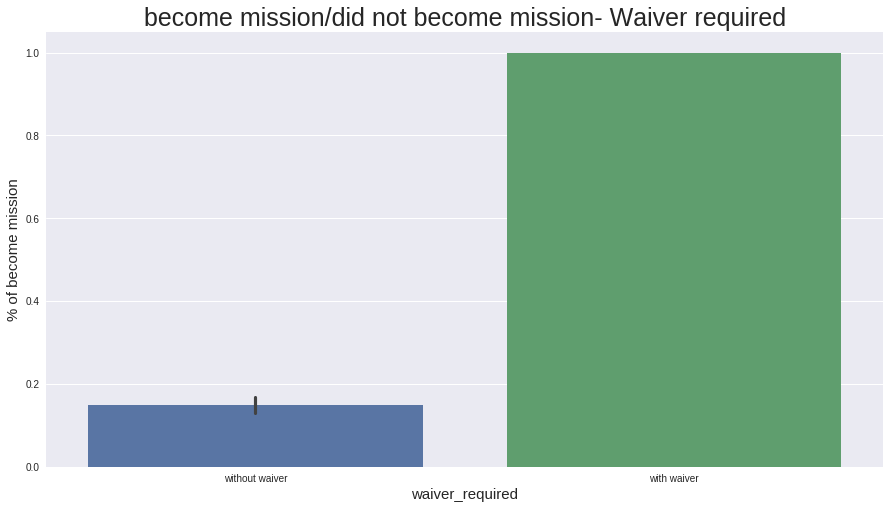

In [52]:
# let's also take a look at the "waiver_required" field. 
# Waiver form released by the primary physician of the patient is needed for 
# a pilot to fly the patient. It's obvious here that without a waiver, 
# those mission_requests are incompelete, thus impossible to become a mission
plt.subplots(figsize = (15,8))
sns.barplot(x = "waiver_required", y = "become_mission", data=afw_3, linewidth=2)
plt.title("become mission/did not become mission- Waiver required", fontsize = 25)
plt.ylabel("% of become mission", fontsize = 15)
plt.xlabel("waiver_required",fontsize = 15)

labels = ['without waiver', 'with waiver']
plt.xticks(sorted(afw_3.waiver_required.unique()), labels);
plt.show()

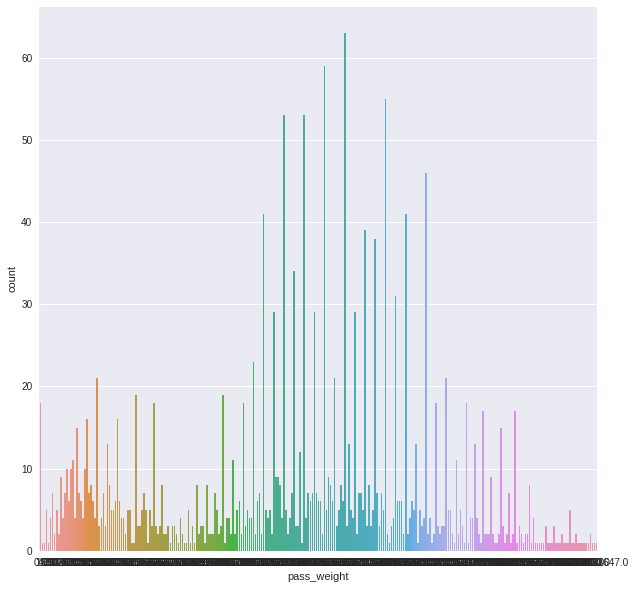

In [0]:
#This is the distribution of the pass_weight
fig, (ax1) = plt.subplots(1,1,figsize=(10,10))
sns.countplot(x='pass_weight', data=afw, ax=ax1)

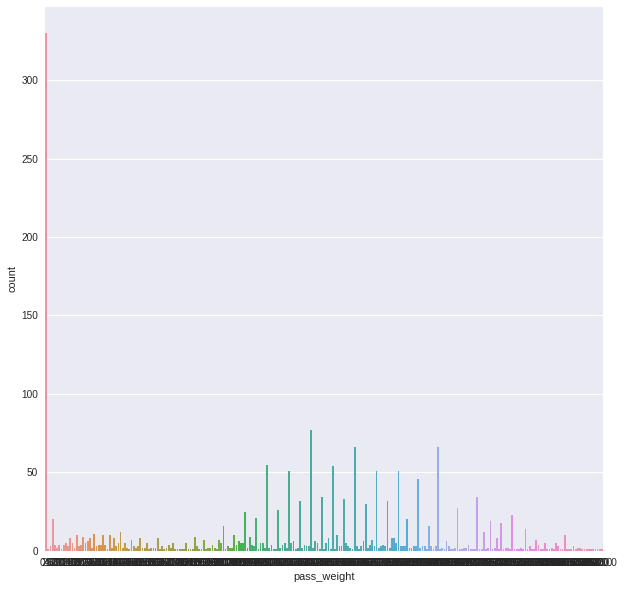

In [57]:
fig, (ax5) = plt.subplots(1,1,figsize=(10,10))
sns.countplot(x='pass_weight', data=non_mission1, ax=ax5)

In [67]:
#it seems that there are several extreme values here
# I tried to print out the extreme values, and got several 
# weigts that are actully over 200lb
print(non_mission.pass_weight>200)

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24       True
25      False
26      False
27      False
28      False
29      False
        ...  
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977     True
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
Name: pass_weight, Length: 2000, dtype: bool


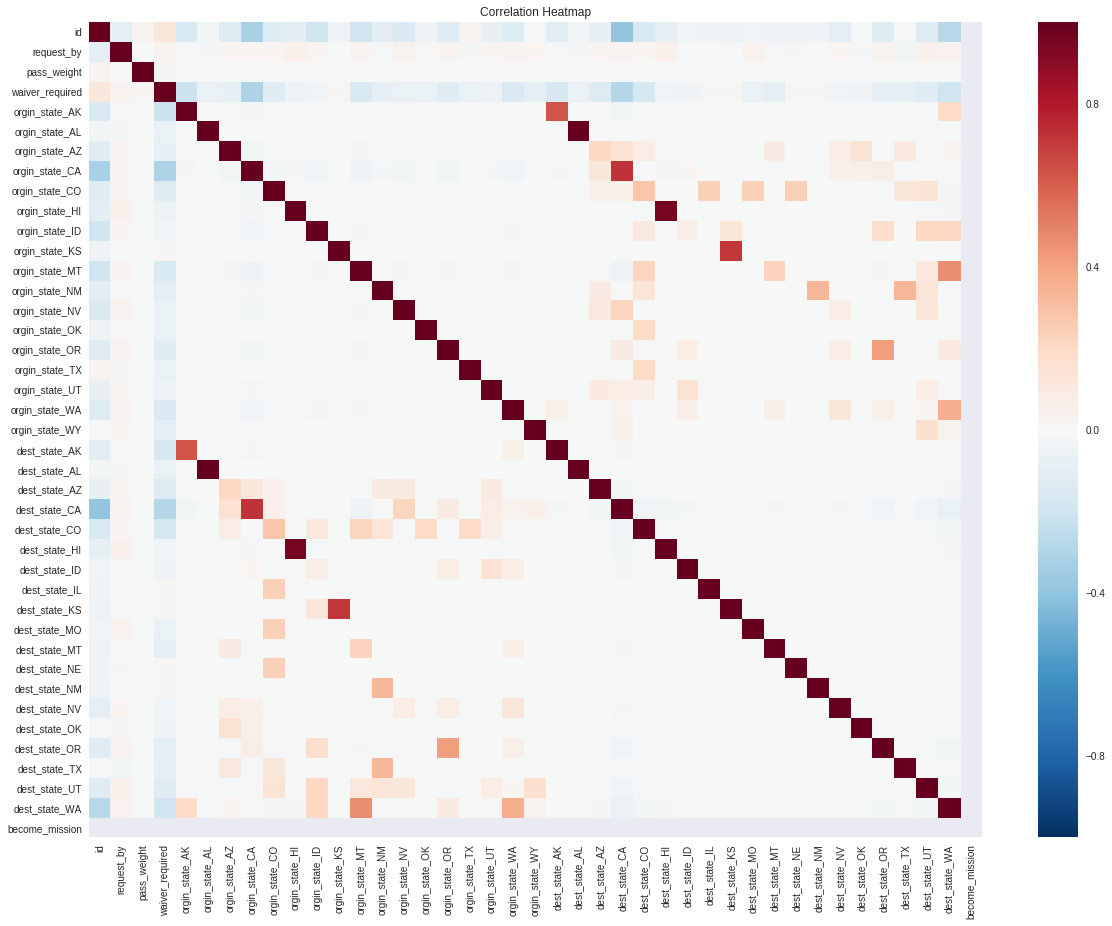

In [0]:
# this is a plot majorly viewing those requests that are successfully became missions:
# where are they from and where are they going
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = afw_1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# Focusing on the left part in the below, about the dest_state,
#there are actually a lot missions that are going to CA, CO, AZ,WA

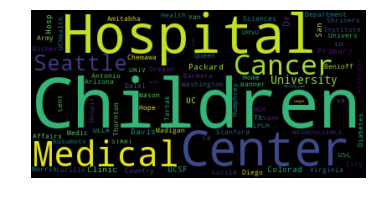

In [69]:
# To testify it, I did another visualization on the facility name that these misions are going to
f=afw['facility_name'].fillna('')
f=str(f)

# Generate a word cloud image
wordcloud = WordCloud().generate(f)

# lower max_font_size
wordcloud = WordCloud(max_font_size=800).generate(f)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# after mapping this result with the original dataset, here are the major hospitals name that what i got:
# Seattle Children's hospital in WA
# UC Davis Health care center
# UCSF
# usc these are all in CA
# Colorado University 
# University of Arizona Cancer center in AZ

## Modelling and Prediction on 'become_mission'

In [0]:
afw_model= pd.read_csv('https://raw.githubusercontent.com/shineeyang/Machine-Learning/master/total_afw_dataset%20for%20prediction.csv')
afw_model.head()
afw_model.info()
#data preperation
afw_model = afw_model.convert_objects(convert_numeric=True)
afw_model.pass_gender[afw_model.pass_gender == 'male'] = 1
afw_model.pass_gender[afw_model.pass_gender == 'female'] = 2
afw_model.pass_gender[afw_model.pass_gender == 'unknown'] = 0
afw_model['waiver_required'] = afw_model['waiver_required'].fillna(0)
afw_3 = afw_model.dropna(subset=["pass_gender", "pass_weight"])
afw_3.isnull().sum()
afw_3.head()

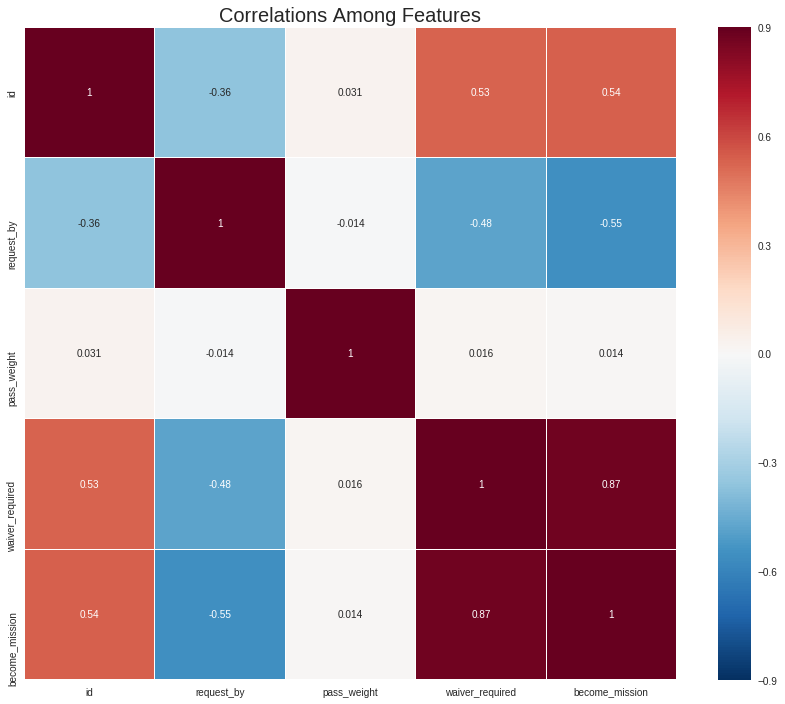

In [49]:
#just a correlation map
plt.subplots(figsize = (15,12))
sns.heatmap(afw_3.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);
plt.show()

## build up model

In [0]:
# I used logistic regression model, random forest classification, as well as decision tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [55]:
afw_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2988 entries, 0 to 3898
Data columns (total 6 columns):
id                 2988 non-null int64
request_by         2988 non-null int64
pass_gender        2988 non-null object
pass_weight        2988 non-null float64
waiver_required    2988 non-null float64
become_mission     2988 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 243.4+ KB


In [0]:
features = afw_3.drop(['id'],axis=1)
target = afw_3.become_mission

In [64]:
train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=30,test_size=0.3)
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using LogisticRegression ",accuracy_score(test_y,model_Log.predict(test_x)))

Accuracy using LogisticRegression  0.6555183946488294


In [62]:
model_RFC = RandomForestClassifier(random_state=45)
model_RFC.fit(train_x,train_y)
print("Accuracy using RandomForestClassifier ",accuracy_score(test_y,model_RFC.predict(test_x)))

Accuracy using RandomForestClassifier  1.0


In [63]:
model_DTC = DecisionTreeClassifier(random_state = 40)
model_DTC.fit(train_x,train_y)
print("Accuracy using DecisionTreeClassifier ",accuracy_score(test_y,model_DTC.predict(test_x)))

Accuracy using DecisionTreeClassifier  1.0


In [0]:
model_RFC = RandomForestClassifier(random_state=45)
model_RFC.fit(features,target)
pred = model_RFC.predict(test_x)

In [77]:
# It turns out the random forest classifier has the higest accuracy number, 
# so I decide to predict with random forest on the 897 test examples, the result 
# is as below, the become_mission=1 means it can become mission, otherwise, it cannot according to the prediction
prediction = pd.DataFrame({
        "id": id,
        "become_mission": pred
    })
print(prediction)

     become_mission                      id
0                 1  <built-in function id>
1                 0  <built-in function id>
2                 0  <built-in function id>
3                 1  <built-in function id>
4                 0  <built-in function id>
5                 0  <built-in function id>
6                 0  <built-in function id>
7                 1  <built-in function id>
8                 1  <built-in function id>
9                 1  <built-in function id>
10                1  <built-in function id>
11                1  <built-in function id>
12                1  <built-in function id>
13                0  <built-in function id>
14                1  <built-in function id>
15                0  <built-in function id>
16                1  <built-in function id>
17                1  <built-in function id>
18                1  <built-in function id>
19                1  <built-in function id>
20                1  <built-in function id>
21                0  <built-in f